# Systemy inspekcji wizualnej  
## Laboratorium  7 - Detekcja ruchu
dr inż. Łukasz Jeleń

Nazwisko i Imię: Śliwiński Mateusz  
Nr albumu:  253403  
data wykonania ćwiczenia: 19.12.2023  

# 1. Narzędzia  
  
  
Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje.

# 2. Zadania.
  
## Zadanie 1 - Detekcja zmian w obrazie (odejmowanie zdjęć)
  
Na wyładzie poświęcownym operacjom na orazach mówiliśmy, że poprzez wyznaczenie różnicy między dwoma obrazami (`cv2.absdiff(src1,src2)`) możemy sprawdzić, czy obiekty na obrazach uległy zmianie.  
  
Do wykonania tego zadania proszę wykorzystać zdjęcia zamieszczone na e-portalu. Należy sprawdzić, czy przedmioty na zdjęciach `3.jpg, 4.jpg, 5.jpg` uległy zmianie lub przesunięciu względem zdjecia `1.jpg` z wykorzystaniem różnicy obrazów. Proszę pamięteć, że najlepszy efekt uzyskamu stosując dodatkowe operacje poprawiające efekt odejmowania: opercje morfologiczne, progowanie.

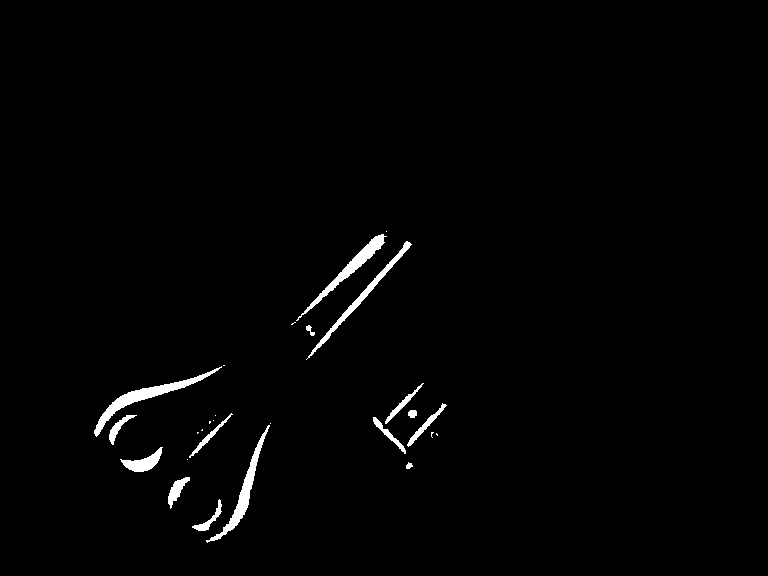

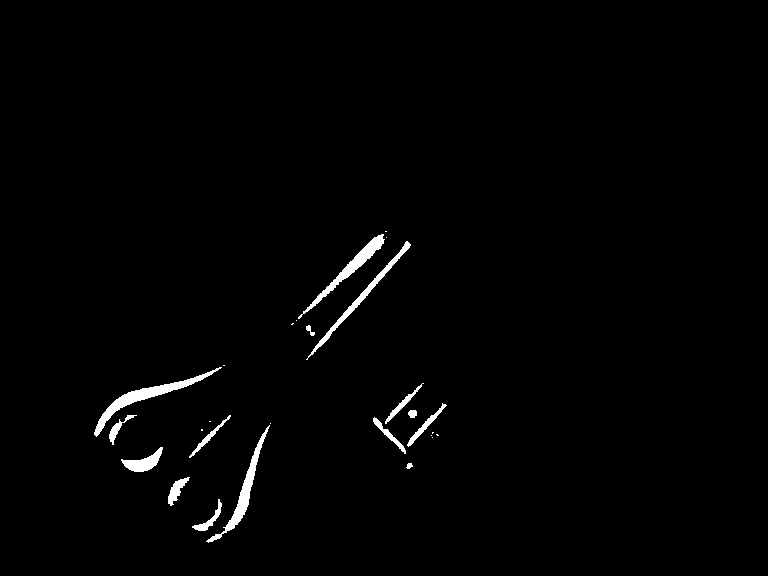

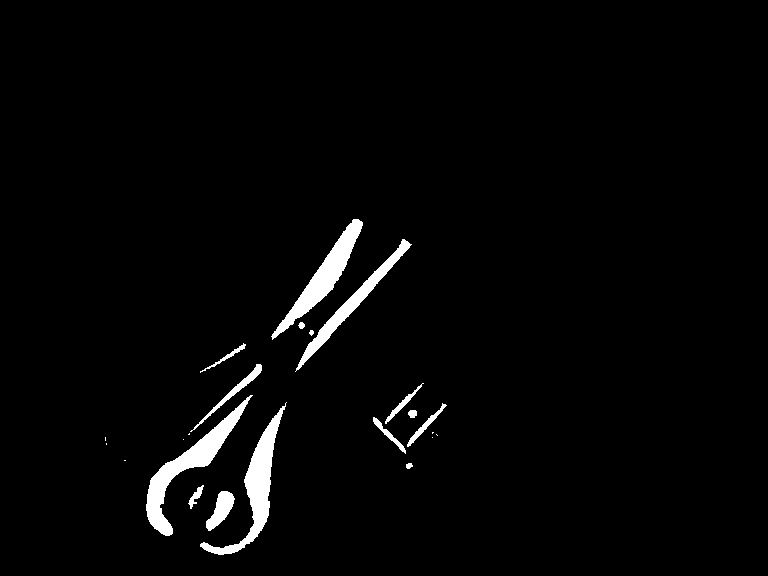

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

reference_image = cv2.imread('1.jpg')

image_3 = cv2.imread('3.jpg')
image_4 = cv2.imread('4.jpg')
image_5 = cv2.imread('5.jpg')

reference_image_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
image_3_gray = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)
image_4_gray = cv2.cvtColor(image_4, cv2.COLOR_BGR2GRAY)
image_5_gray = cv2.cvtColor(image_5, cv2.COLOR_BGR2GRAY)

diff_3 = cv2.absdiff(reference_image_gray, image_3_gray)
diff_4 = cv2.absdiff(reference_image_gray, image_4_gray)
diff_5 = cv2.absdiff(reference_image_gray, image_5_gray)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
diff_3 = cv2.morphologyEx(diff_3, cv2.MORPH_CLOSE, kernel)
diff_4 = cv2.morphologyEx(diff_4, cv2.MORPH_CLOSE, kernel)
diff_5 = cv2.morphologyEx(diff_5, cv2.MORPH_CLOSE, kernel)

threshold = 127
diff_3_thresh = cv2.threshold(diff_3, threshold, 255, cv2.THRESH_BINARY)[1]
diff_4_thresh = cv2.threshold(diff_4, threshold, 255, cv2.THRESH_BINARY)[1]
diff_5_thresh = cv2.threshold(diff_5, threshold, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(diff_3_thresh)
cv2_imshow(diff_4_thresh)
cv2_imshow(diff_5_thresh)

## Zadanie 2 - Detekcja zmian w obrazie (dzielenie obrzów)

Dzielienie jest kolejną opreacją, którą można wykorzystać w celu detekcji zmian w obrazie.  
  
Do wykonania tego zadania również proszę wykorzystać zdjęcia zamieszczone na e-portalu. Należy sprawdzić, czy przedmioty na zdjęciach 3.jpg, 4.jpg, 5.jpg uległy zmianie lub przesunięciu względem zdjecia 1.jpg z wkorzystaniem ilorazu zdjęć. Proszę pamięteć, że najlepszy efekt uzyskamu stosując dodatkowe operacje poprawiające efekt odejmowania: opercje morfologiczne, progowanie.

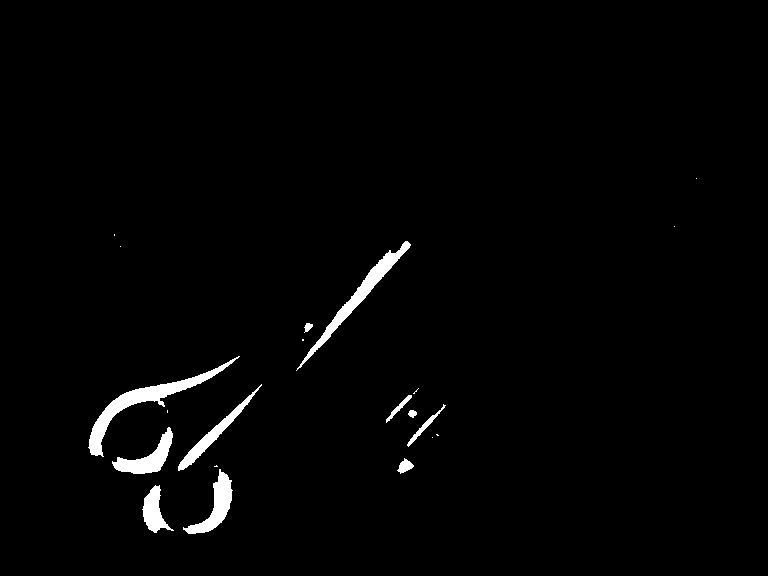

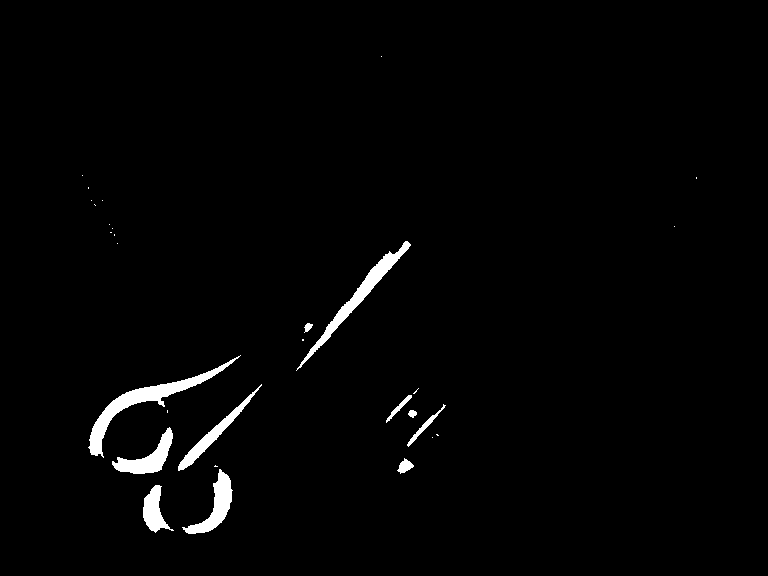

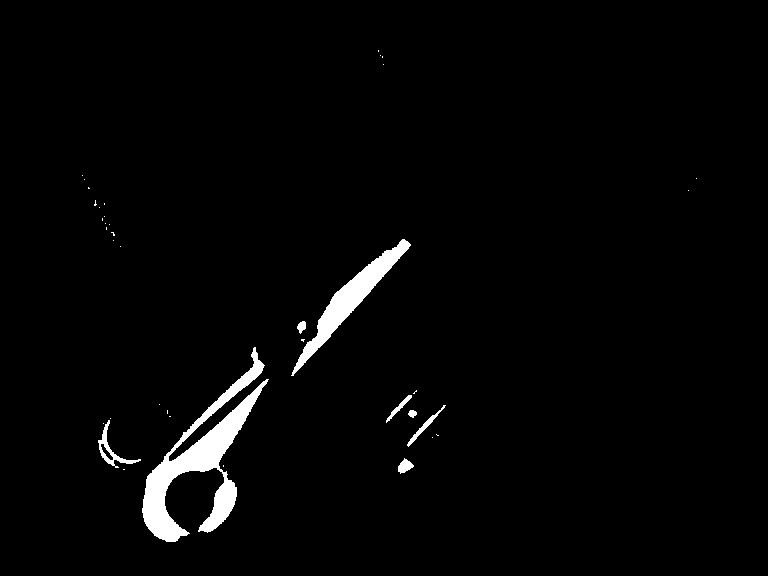

In [31]:
import cv2
from google.colab.patches import cv2_imshow

reference_image = cv2.imread('1.jpg')
image_3 = cv2.imread('3.jpg')
image_4 = cv2.imread('4.jpg')
image_5 = cv2.imread('5.jpg')

reference_image_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
image_3_gray = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)
image_4_gray = cv2.cvtColor(image_4, cv2.COLOR_BGR2GRAY)
image_5_gray = cv2.cvtColor(image_5, cv2.COLOR_BGR2GRAY)

quotient_3 = cv2.divide(image_3_gray, reference_image_gray)
quotient_4 = cv2.divide(image_4_gray, reference_image_gray)
quotient_5 = cv2.divide(image_5_gray, reference_image_gray)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
quotient_3 = cv2.morphologyEx(quotient_3, cv2.MORPH_CLOSE, kernel)
quotient_4 = cv2.morphologyEx(quotient_4, cv2.MORPH_CLOSE, kernel)
quotient_5 = cv2.morphologyEx(quotient_5, cv2.MORPH_CLOSE, kernel)

threshold = 2
quotient_3_thresh = cv2.threshold(quotient_3, threshold, 255, cv2.THRESH_BINARY)[1]
quotient_4_thresh = cv2.threshold(quotient_4, threshold, 255, cv2.THRESH_BINARY)[1]
quotient_5_thresh = cv2.threshold(quotient_5, threshold, 255, cv2.THRESH_BINARY)[1]

cv2_imshow(quotient_3_thresh)
cv2_imshow(quotient_4_thresh)
cv2_imshow(quotient_5_thresh)

## Zadanie 3 - detekcja ruchu

Techniki wykrywania zmian w obrazach możemy łatwo zastosować do stumienia wideo i zbudować detektor ruchu. W tym celu wczytujemy pierwszą ramkę wideo jako ramka referencyjna, a następnie wykonujemy operację odejmowania lub dzielenia ramki referencyjnej przez kolejne. Ogólny schemat można zapisać:


1.   wczytaj wideo
2.   zamień ramkę na obraz monochromatyczny
3. zastosuj filtr wygładzający (np. Gaussowaski)
4. dla kolejnej rami powtórz kroki 2 i 3
5. Odejmij drugą ramkę od pierwszej
6. zapisz drugą ramkę jako referencyjną
7. do wynku odejmowania zastosuj operacje morfologiczne i progowanie
8. z obrazu wynikowego wylicz kontury
9. na podstawie konturów oblicz prostokąt okalający (bounding box)
10. nanieś prostokąt na oryginalne wideo.
11. wyświetl wynik


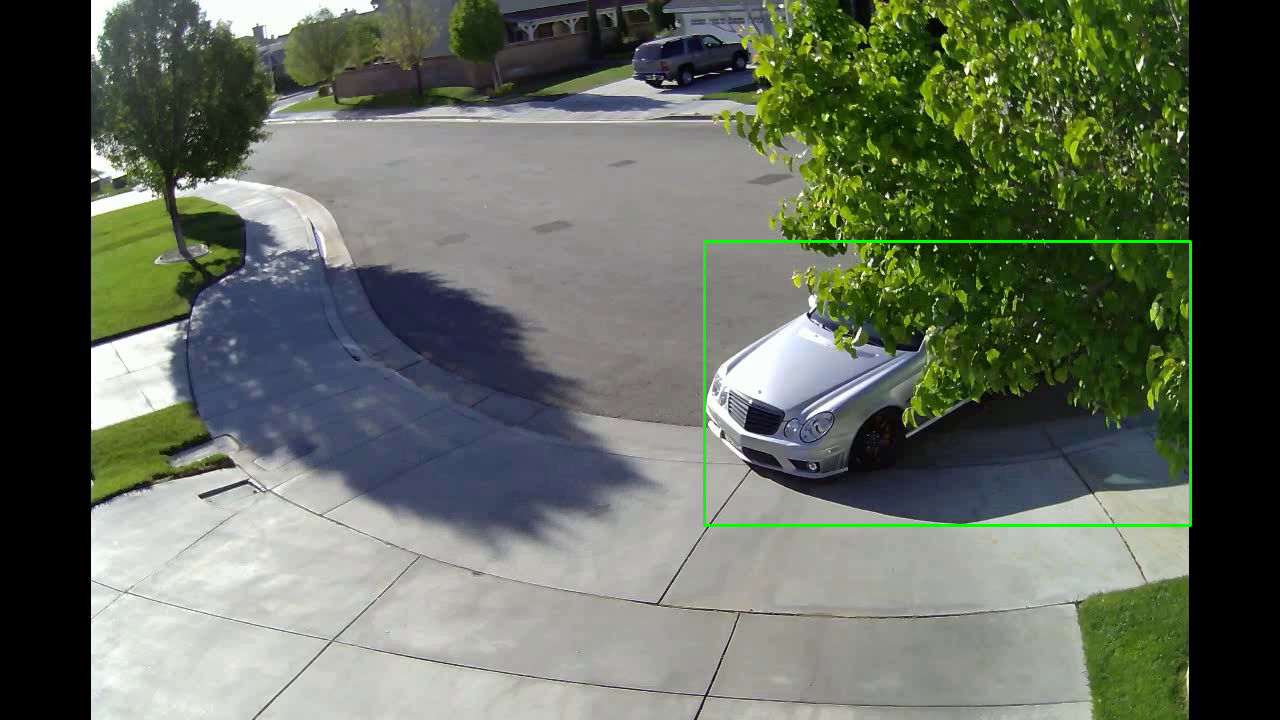

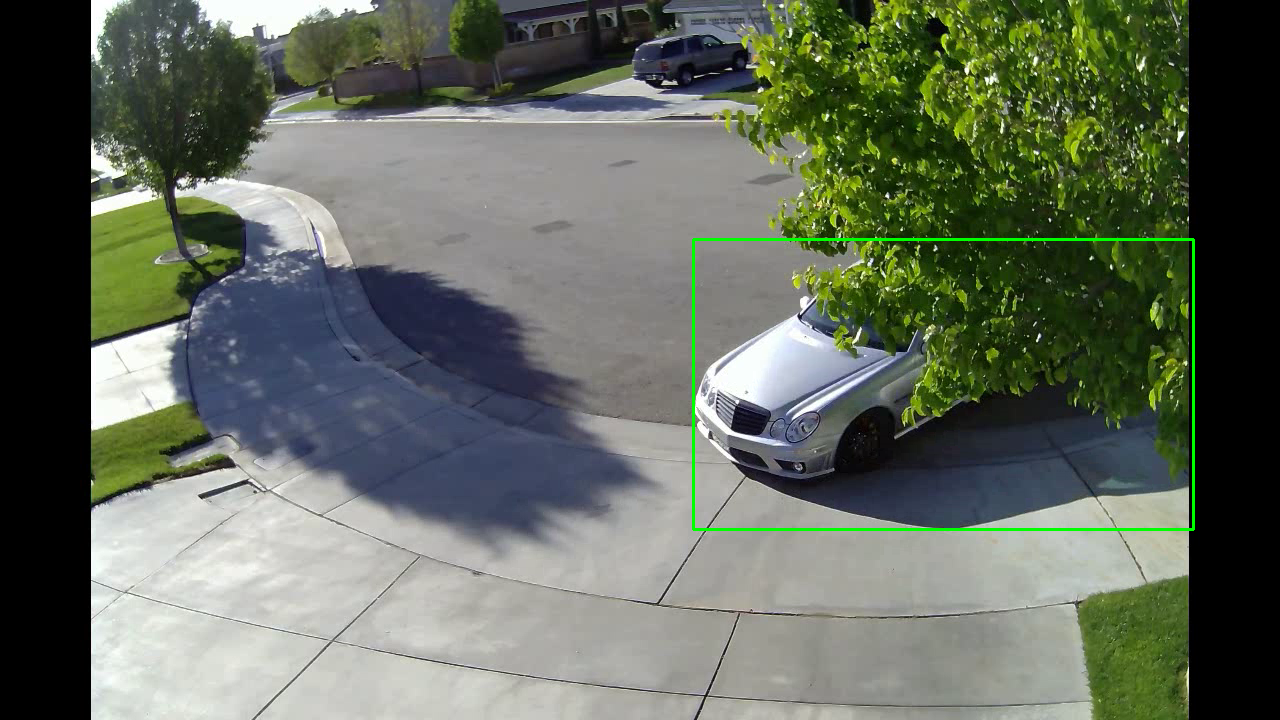

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('test3.avi')

ref_frame = cap.read()[1]
ref_gray = cv2.cvtColor(ref_frame, cv2.COLOR_BGR2GRAY)
ref_blur = cv2.GaussianBlur(ref_gray, (5, 5), 0)
frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_count += 1
    if frame_count % 5 != 0:
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    diff = cv2.absdiff(blur, ref_blur)
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    cnts = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        if w * h > 80000:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2_imshow(frame)
    ref_frame = frame
    ref_gray = cv2.cvtColor(ref_frame, cv2.COLOR_BGR2GRAY)
    ref_blur = cv2.GaussianBlur(ref_gray, (5, 5), 0)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Detekcja ruchu z kamery

Państwa zadaniem jest napisanie prostej aplikacji, która będzie przetwarzać obraz z kamery komputera i poinformuje użytkownika jeśli w obrazie z kamery zostanie wykrytu ruch. Należy wyświetlić stosowny komunikat w konsoli oraz na podglądzie z kamery.

In [ ]:
#przetestowane na innym srodowisku, google colab nie mogl otworzyc kamerki
import cv2

cap = cv2.VideoCapture(0)

bg_subtractor = cv2.createBackgroundSubtractorKNN()
bg_subtractor.setDetectShadows(False)
bg_subtractor.setHistory(100)
bg_subtractor.setNSamples(20)
bg_subtractor.setDist2Threshold(400)
prev_frame = None
pixel_change_threshold = 200
motion_detected = False

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    fg_mask = bg_subtractor.apply(gray)
    thresh = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    motion_detected = False

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        num_non_zero_pixels = cv2.countNonZero(thresh[y:y + h, x:x + w])

        if num_non_zero_pixels > pixel_change_threshold:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            motion_detected = True

    if motion_detected:
        print("Motion detected!")
        cv2.putText(frame, "Motion detected!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2_imshow(frame)
    # cv2.imshow("Frame",frame)
    prev_frame = frame
    key = cv2.waitKey(1) & 0xFF

    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()